### Face Recognition using PCA (Concept)

In [69]:
# package
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# load image source from lfw (Labeled Faces in the Wild)
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [7]:
for name in lfw_people.target_names:
    print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


In [11]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]
 
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

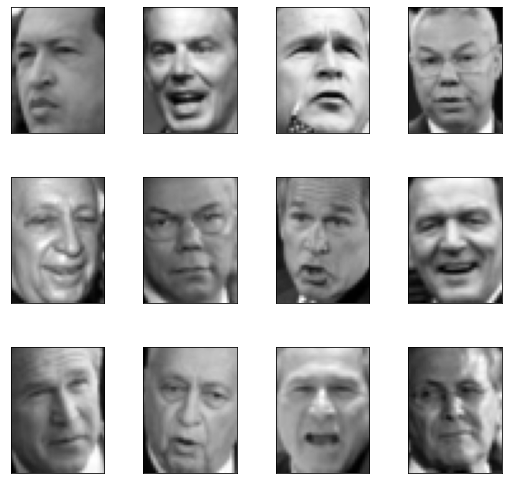

In [30]:
# Function to plot images in 3 * 4 
def plot_gallery(images, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, h, w)

In [16]:
# split the training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)

In [45]:
# pca analysis
from sklearn.decomposition import PCA

n_components = 100 #suppose we want to extract the top 100 Eigenfaces from the algorithm
 
pca = PCA(n_components = n_components, svd_solver ='randomized', whiten = True).fit(X_train)

pca.explained_variance_ratio_

array([0.19013724, 0.15237714, 0.07059053, 0.06271534, 0.04932109,
       0.02962253, 0.02535085, 0.021453  , 0.01970233, 0.01866214,
       0.01659109, 0.01481174, 0.01266202, 0.01149053, 0.01067751,
       0.0097239 , 0.00943667, 0.00910281, 0.00825227, 0.00718065,
       0.00680754, 0.0065152 , 0.00617903, 0.0058929 , 0.00541976,
       0.00532467, 0.00508491, 0.00489345, 0.00480868, 0.00439366,
       0.00400446, 0.00372362, 0.0036716 , 0.00348272, 0.00336558,
       0.00329899, 0.00311818, 0.00303228, 0.00298658, 0.00281389,
       0.0027518 , 0.002722  , 0.00261666, 0.00256146, 0.00246806,
       0.00238815, 0.00235193, 0.00230096, 0.00222756, 0.00220021,
       0.00209075, 0.00205191, 0.00200317, 0.00197811, 0.00194533,
       0.00191044, 0.00180043, 0.00178376, 0.00174144, 0.00170883,
       0.00167726, 0.00164581, 0.00159191, 0.00157059, 0.00151719,
       0.00148738, 0.00143891, 0.00142078, 0.00140331, 0.00137114,
       0.0013657 , 0.00135014, 0.00129801, 0.00128091, 0.00125

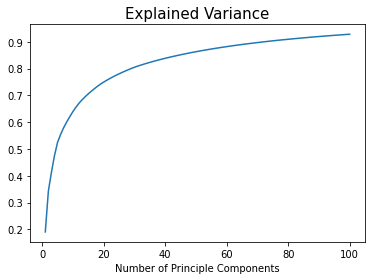

adding up all top 100 PCs we have total variance of 0.92853624


In [49]:
plt.plot(range(1,len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum())
plt.title('Explained Variance', fontsize=15)
plt.xlabel('Number of Principle Components', fontsize=10)
plt.show()
print("adding up all top 100 PCs we have total variance of", pca.explained_variance_ratio_.sum())

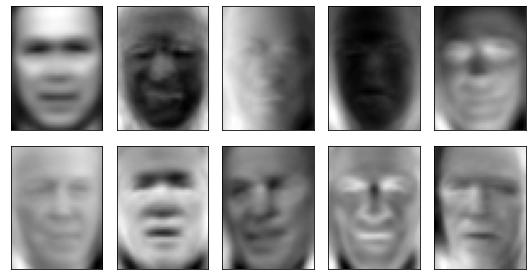

In [66]:
eigenfaces = pca.components_
#plot the average face and top eigenfaces
Xmean = np.mean(X,axis=0).reshape(1,n_features) # average face
plot_faces(np.concatenate((Xmean,eigenfaces[:10]),axis=0))

### SVM classification

In [67]:
# SVM algorithm to classify the face
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel ='rbf', class_weight ='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

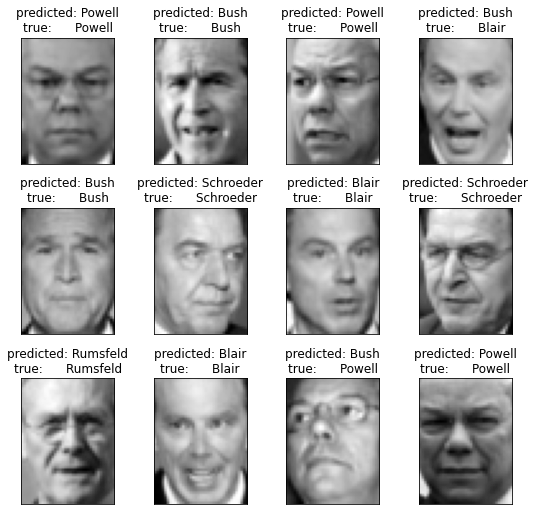

In [68]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)